# 인스타로 맛집 크롤링하기

## 로그인 후 해당 해시태그의 게시물로 이동하기

In [ ]:
# 인스타그램 크롤링
# 인스타그램 검색결과 URL을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [ ]:
# 필요 패키지 불러오기
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 웹 드라이버 실행
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 제주도맛집이라는 키워드로 인스타그램 검색결과를 확인하는 URL 확인
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [ ]:
# 첫번째 게시글을 찾아 클릭하여 열어보기
def select_first(driver):
    # F12를 통해 개발자 도구 페이지로 가서 class명이 '_aagu'인 부분을 살펴보면 게시글에 해당된다
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
select_first(driver)

* 개발자 도구의 태그명은 자주 바뀌므로 크롤링 시에 오류가 난다면 태그가 바뀌었을 가능성이 많다.

* 위의 방법은 로그인을 일일히 해야하며, 그 이후 자신의 피드로 리다이렉트된다는 번거로움 존재, 아래와 같은 방법을 사용하여 처음부터 로그인을 하고 인스타 크롤링을 진행한다.

In [1]:
# 인스타그램 크롤링
# 인스타그램 검색결과 URL을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


# 크롬 드라이버를 로드
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 로그인 페이지로 이동
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)

# 사용자 이름과 비밀번호를 입력
username = driver.find_element(By.NAME, 'username')
password = driver.find_element(By.NAME, 'password')
username.send_keys('chuncm@naver.com')
password.send_keys('970dnswjsqud0402!')

# 로그인 버튼을 클릭
login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
login_button.click()
time.sleep(5)

word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_53468\921766561.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [3]:
# 클릭하면 첫번째 게시글로 이동하기
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [4]:
# 패키지 불러오기
import re
from bs4 import BeautifulSoup

## 맛집 크롤링

In [5]:
# 맛집 크롤링
def get_content(driver):
    # 현재 페이지 html정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문내용 가져오기
    try:
        # 태그명이 div, class명이 _a9zs인 태그 아래에 있는 span태그를 모두 선택하고,
        # 그 중 첫 번째 태그를 선택하여, 해당 태그의 텍스트 부분을 추출
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    # 본문 내용에서 해시태그 가져오기(정규표현식 활용)
    # #으로 시작하여, #뒤에 연속된 문자(공백이나 #, \기호가 아닌 경우)를 모두 찾아서 리스트 형태로 저장
    tags = re.findall(r'#[^\s#,\<]+', content)
    
    # 날짜(작성일자) 정보 가져오기
    # 태그명이 time, class명이 _aaqe인 태그를 모두 선택하고
    # 그 중 첫번째 태그를 선택한 뒤, 해당 태그의 datetime 속성값의 0~9번째 글자 슬라이싱
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    # 좋아요 수 가져오기
    try:
        # 태그명이 div, class명이 다음과 같은 태그 바로 아래에 있는 span태그 모두 선택
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
    # 위치(장소)정보 가져오기
    try:
        # div태그 중 class명이 _aaqm인 것을 선택해 화면에 노출되는 첫 번째 태그의 text를 가져옴
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
 '2023-04-05',
 0,
 '',
 ['#제주도맛집',
  '#제주맛집',
  '#제주공항근처횟집',
  '#제주횟집',
  '#제주도횟집',
  '#제주시횟집',
  '#제주회포장',
  '#제주도회포장',
  '#제주횟집추천',
  '#노형동맛집',
  '#연동맛집',
  '#드림타워맛집',
  '#이호테우해변맛집']]

In [10]:
# 다음 게시글 열기
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

## 여러 게시글을 수집하기

In [33]:
# 여러 게시글 수정하기
# 검색어
word = '제주데이트'

# 인스타그램 검색페이지 URL만들기
url = insta_searching(word)

In [34]:
# 검색페이지 접속
driver.get(url)
time.sleep(3)

In [36]:
# 첫번째 게시글 클릭
select_first(driver)

In [37]:
# 여러 게시글을 수집
results = []
# 게시글 수집을 위해 크롤링 할 게시글 수 지정
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        # 게시글 수집에 오류 발생 시(네트워크 문제 등의 이유로), 2초 대기 후, 다음게시물로 넘어가도록 지정
        time.sleep(2)
        move_next(driver)
print(results[:2])

[['아침일찍 오픈해서 아침식사하기 딱 좋은명희네고기국수성산일출봉점 ❤\u200d🔥❤\u200d🔥오~랜시간 우려낸 육수와 매일 직접만든 반찬그리고 두툼하고 육즙 장난없는 돔베고기와국수의 완벽조화..! 거기다 김치까지 츄류륩,,,🤤돔베고기와 국수를 동시에 먹는 세트메뉴가 젤인기라니우리도 인기메뉴로 아침먹고 제주여행 시작해볼까나?~@@🔸위치 서귀포시 성산읍 한도로 82 명희네 고기국수 성산일출봉점🔸시간: 06:00-20:00 (L.O 19:30)🔸문의 010-5331-0045...#성산일출봉맛집 #성산일출봉 #고기국수맛집 #제주여행 #성산아침식사 #우도#제주여행추천 #제주아침 #제주아침식사#제주데이트 #제주밥집 #제주가볼만한곳', '2023-04-05', 0, '', ['#성산일출봉맛집', '#성산일출봉', '#고기국수맛집', '#제주여행', '#성산아침식사', '#우도', '#제주여행추천', '#제주아침', '#제주아침식사', '#제주데이트', '#제주밥집', '#제주가볼만한곳']], ['제주도 대표! 보말칼국수 보증맛집 남순이네!*남순이네국수제주에서 맛집 찾으시는분들은 여기 메모하세요! ( •̀ ω •́ )✧제주도의 보물 보말을 이용하여 만든 대표 보말집!보말은 고둥을 통칭해서 부르는 제주도 방언이라는 ㅎㅎ단백질도 풍부하고 지방이 적어서 다이어트 음식으로도 좋다는 보말여자친구 데리고 가면 이쁨 듬뿍 받겠쥬?가성비와 맛 둘다 챙길 수 있는 세트메뉴 시켜서 참기름 향 찐~하게 나는 보말죽을 에피타이저로 시작하고 보말 잔뜩 들어간 보말칼국수와 남순이네국수 자랑 메뉴 돼지고기 수육 싸서 한입에 가득 머금으면 그야말로 제주를 느낄 수 있는 맛,,,💖제주공항에서 나와 해안도로 따라 쭉 드라이브 하다보면 바로 길가 옆에 있어접근성도 좋고 깔끔한 인테리어와 기염댕댕 소품들로 기염뽀짝 감성 한번 느껴주는게 분위기부터 사장님의 센스가 돋보임여름에는 야외에서 먹을 수 있는 야외 테이블도 준비되어 있으니제주바다 한눈에 담으면서 칼국수 한입, 보말죽 한입, 수육 한입, 소라무침 한입

In [15]:
# 크롤링 한 데이터 저장
import pandas as pd

In [16]:
# 제주도맛집 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip.xlsx', index = False)

In [21]:
# 제주맛집 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip2.xlsx', index = False)

In [27]:
# 제주현지인맛집 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip3.xlsx', index = False)

In [32]:
# 제주카페 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuCafe.xlsx', index = False)

In [38]:
# 제주데이트 결과저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuDate.xlsx', index = False)

In [39]:
# 여러 키워드로 검색한 결과를 저장하여 통합 저장
jeju_insta_df = pd.DataFrame([])
# 파일이 저장되어있는 위치
folder = './'
f_list = ['crawling_jejuMatjip.xlsx', 'crawling_jejuMatjip2.xlsx', 'crawling_jejuMatjip3.xlsx', 'crawling_jejuCafe.xlsx', 'crawling_jejuDate.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

# 중복데이터 제거 후 저장

# content열의 데이터에 들어있는 게시글의 본문 내용이 동일하면 중복으로판당하고 제거
# inplace = True 옵션을 사용해 원본 데이터 변경
jeju_insta_df.drop_duplicates(subset=['content'], inplace = True)

# 데이터 저장
jeju_insta_df.to_excel('crawling_jeju.xlsx', index = False)

C:\Users\chunc\AppData\Local\Temp\ipykernel_53468\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_53468\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_53468\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_53468\3761463653.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\A

In [40]:
# 데이터 확인
jeju_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  279 non-null    object
 1   date     279 non-null    object
 2   like     279 non-null    int64 
 3   place    123 non-null    object
 4   tags     279 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.1+ KB


## 워드 클라우드

* 텍스트 내에서 출현하는 단어들의 출현 빈도수에 비례하는 크기로 표출한 그래프
* 크롤링한 데이터 중 해시태그를 불러온 후, 종류별 빈도수를 집계
* 해시태그별 빈도수를 그래프를 통해 살펴본 뒤, 의미 있는 해시태그들로 워드 클라우드를 만들어 주요 키워드 확인

In [41]:
# 워드 클라우드
# 크롤링 결과 중 해시태그 불러오기
import pandas as pd
raw_total = pd.read_excel('crawling_jeju.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집', '#제주맛집', '#제주공항근처횟집', '#제주횟집', '#제주...
1    ['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도...
2    ['#백기해녀의집', '#푸민_제주\u200b', '#제주맛집', '#제주도맛집',...
Name: tags, dtype: object

In [42]:
# 해시태그 통합 저장
tags_total = []
for tags in raw_total['tags']:
    # 저장된 태그에서 "', '"를 기준으로 분할해준다
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [43]:
# 저장한 태그들 확인
tags_total[:30]

['#제주도맛집',
 '#제주맛집',
 '#제주공항근처횟집',
 '#제주횟집',
 '#제주도횟집',
 '#제주시횟집',
 '#제주회포장',
 '#제주도회포장',
 '#제주횟집추천',
 '#노형동맛집',
 '#연동맛집',
 '#드림타워맛집',
 '#이호테우해변맛집',
 '#서귀포맛집',
 '#제주중문맛집',
 '#서귀포횟집',
 '#중문횟집',
 '#제주도횟집',
 '#중문맛집',
 '#제주횟집',
 '#제주도민맛집',
 '#제주오션뷰맛집',
 '#서귀포맛집추천',
 '#제주도맛집',
 '#백기해녀의집',
 '#푸민_제주\\u200b',
 '#제주맛집',
 '#제주도맛집',
 '#서귀포맛집',
 '#성산맛집']

In [44]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('#제주맛집', 90),
 ('#제주카페', 68),
 ('#제주여행', 66),
 ('', 60),
 ('#제주도맛집', 58),
 ('#제주데이트', 53),
 ('#제주핫플', 36),
 ('#제주공항근처맛집', 34),
 ('#제주도여행', 33),
 ('#제주도', 30),
 ('#제주', 29),
 ('#서귀포맛집', 27),
 ('#제주도민맛집', 27),
 ('#애월맛집', 27),
 ('#제주시맛집', 26),
 ('#제주여행코스', 26),
 ('#제주맛집추천', 25),
 ('#제주가볼만한곳', 25),
 ('#제주현지인맛집', 24),
 ('#제주도카페', 24),
 ('#제주공항맛집', 21),
 ('#제주카페추천', 19),
 ('#제주핫플레이스', 17),
 ('#제주도맛집추천', 17),
 ('#제주살이', 15),
 ('#한림맛집', 15),
 ('#중문맛집', 14),
 ('#서귀포카페', 14),
 ('#먹스타그램', 12),
 ('#jeju', 12),
 ('#연동맛집', 11),
 ('#일상', 11),
 ('#제주도데이트', 11),
 ('#서귀포카페추천', 11),
 ('#제주흑돼지맛집', 10),
 ('#애월가볼만한곳', 10),
 ('#제주애월맛집', 10),
 ('#제주도핫플', 10),
 ('#제주신상카페', 10),
 ('#서귀포핫플', 10),
 ('#소통', 9),
 ('#애월카페', 9),
 ('#협재맛집', 9),
 ('#제주숙소', 9),
 ('#서귀포데이트', 9),
 ('#제주술집', 8),
 ('#맞팔', 8),
 ('#제주데이트코스', 8),
 ('#여행', 8),
 ('#데일리', 8),
 ('#제주포토존', 8),
 ('#한담맛집', 7),
 ('#하귀맛집', 7),
 ('#제주가족여행', 7),
 ('#신화월드맛집', 7),
 ('#좋아요', 7),
 ('#애월해안도로맛집', 7),
 ('#제주도여행코스', 7),
 ('#좋반', 7),
 ('#제주카페투어', 7),
 ('#제주도민',

In [46]:
# 데이터 정제
# 필요없는 해시태그 정의하여 제외시켜준다
STOPWORDS = ['', '#일상', '#맞팔', '#먹팔맞팔', '#데일리룩', 'ootd', '#fff', '#먹스타', '#먹스타맞팔', \
             '#소통', '#제주포토존', '#먹방', '#먹팔', '#좋아요', '#제주펜션', '#데일리', '#제주숙소', \
            '#팔로우', '#좋반', '#좋아요반사', 'daily', '#좋테']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(100)

[('#제주맛집', 90),
 ('#제주카페', 68),
 ('#제주여행', 66),
 ('#제주도맛집', 58),
 ('#제주데이트', 53),
 ('#제주핫플', 36),
 ('#제주공항근처맛집', 34),
 ('#제주도여행', 33),
 ('#제주도', 30),
 ('#제주', 29),
 ('#서귀포맛집', 27),
 ('#제주도민맛집', 27),
 ('#애월맛집', 27),
 ('#제주시맛집', 26),
 ('#제주여행코스', 26),
 ('#제주맛집추천', 25),
 ('#제주가볼만한곳', 25),
 ('#제주현지인맛집', 24),
 ('#제주도카페', 24),
 ('#제주공항맛집', 21),
 ('#제주카페추천', 19),
 ('#제주핫플레이스', 17),
 ('#제주도맛집추천', 17),
 ('#제주살이', 15),
 ('#한림맛집', 15),
 ('#중문맛집', 14),
 ('#서귀포카페', 14),
 ('#먹스타그램', 12),
 ('#jeju', 12),
 ('#연동맛집', 11),
 ('#제주도데이트', 11),
 ('#서귀포카페추천', 11),
 ('#제주흑돼지맛집', 10),
 ('#애월가볼만한곳', 10),
 ('#제주애월맛집', 10),
 ('#제주도핫플', 10),
 ('#제주신상카페', 10),
 ('#서귀포핫플', 10),
 ('#애월카페', 9),
 ('#협재맛집', 9),
 ('#서귀포데이트', 9),
 ('#제주술집', 8),
 ('#제주데이트코스', 8),
 ('#여행', 8),
 ('#한담맛집', 7),
 ('#하귀맛집', 7),
 ('#제주가족여행', 7),
 ('#신화월드맛집', 7),
 ('#애월해안도로맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주카페투어', 7),
 ('#제주도민', 7),
 ('#셀스타그램', 7),
 ('#제주횟집', 6),
 ('#노형동맛집', 6),
 ('#제주중문맛집', 6),
 ('#성산일출봉맛집', 6),
 ('#외도맛집', 6),
 ('#제주흑돼지', 6),
 ('#제

In [47]:
# 시각화를 위해 워드 클라우드 실행
import matplotlib.pyplot as plt
import seaborn as sns
# 폰트 설정
# from matplotlib import font_manager, rc
# import sys

# if sys.platform in ["win32", "win64"]:
#     font_name = "malgun gothic"
# elif sys.platform == "darwin":
#     font_name = "AppleGothic"

# rc('font',family=font_name)

In [48]:
# 빈도수 기준 상위 30개의 데이터를 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<Axes: xlabel='counts', ylabel='tags'>

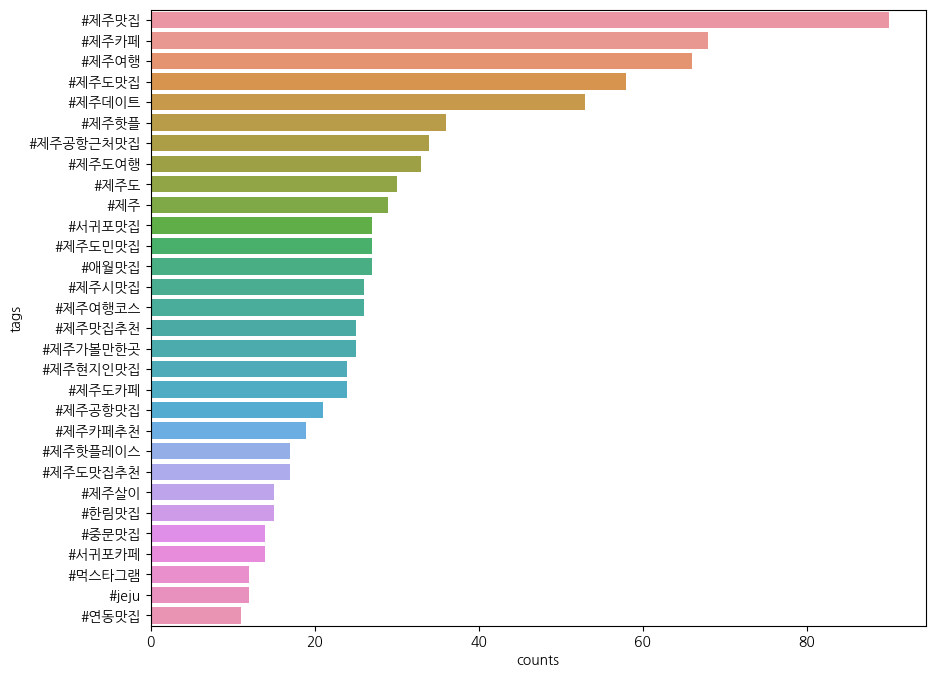

In [49]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))

sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [ ]:
!pip install wordcloud

In [50]:
# 워드 클라우드를 위한 패키지 불러오기
from wordcloud import WordCloud
import platform

In [51]:
# 워드 클라우드에 필요한 글꼴 지정
# 윈도우의 경우
if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
# Mac 의 경우
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

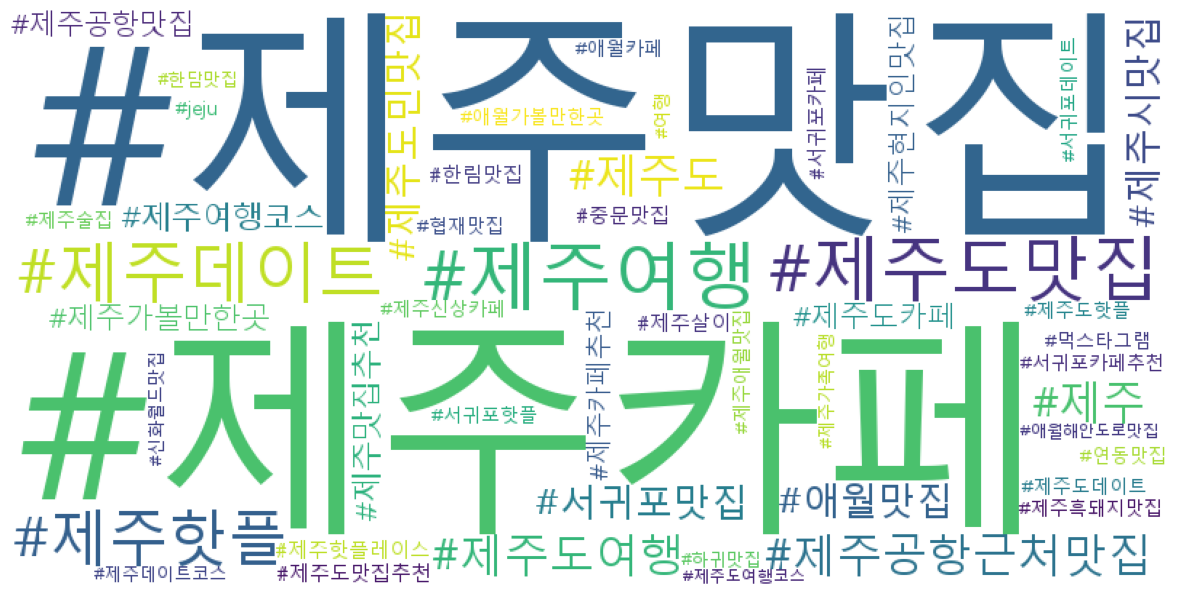

In [53]:
# 워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
# 원하는 경로에 워드 클라우드 이미지 파일 저장
plt.savefig('./tag-wordcloud.png')

* generate_from_frequencies() 함수에 tag_counts_selected 데이터를 넣어 워드클라우드 생성
* relative_scaling: 0에 가까울수록 빈도수의 순위에 1에 가까울수록 빈도수에 더 큰 영향을 보임
* 워드 클라우드를 실행할 때마다 배치, 색상 등은 무작위로 만들어지기에 표현하기 적합한 그림이 나올 때까지 만들어 사용하는 것이 좋다

## 지도 시각화

* folium 라이브러리 활용
* folium은 웹 기반 지도를 만들기 때문에 웹 환경에서만 지도 확인 가능, 지도는 웹으로 저장 후 확인이 가능하다.

In [54]:
# 지도 시각화
# 크롤링 된 데이터에서 위치 정보가 저장되어 있는 place를 선택한 뒤
# value_counts() 함수를 통해 빈도수 집계
location_counts = raw_total['place'].value_counts()
location_counts

제주도 제주               17
환상의 섬 Jeju Island     8
제주도                   4
Jeju-do               3
서울                    3
                     ..
이태원                   1
제주도 올레시장              1
Rgogi in Jeju         1
인스밀                   1
신산공원                  1
Name: place, Length: 83, dtype: int64

In [55]:
# pandas 데이터프레임의 형태로 저장
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,17
환상의 섬 Jeju Island,8
제주도,4
Jeju-do,3
서울,3


In [56]:
location_counts_df.to_excel('./location_counts.xlsx')

In [57]:
# 위치 정보만 선택 후 list형태로 변환한 뒤 저장
locations = list(location_counts.index)
locations

['제주도 제주',
 '환상의 섬 Jeju Island',
 '제주도',
 'Jeju-do',
 '서울',
 'Seogwipo, Jeju Island, South Korea',
 '퍼플모스 Purple Moss',
 '제주도 애월읍',
 '월정리해변',
 '전농로 벚꽃축제',
 'APMA',
 '영종하늘도시 SKY CITY',
 '제주도 제주시',
 'All that JEJU (올댓제주)',
 '우도 牛岛 Udo Island, South Korea',
 '무로이',
 '카페갤럭시아 제주',
 '제주도 우도',
 '니모메빈티지라운지',
 'cafe_destijl',
 '델문도 로스터스(커피공장) 본점',
 '중문관광단지 (Jungmun Tourism Complex)',
 '미남미녀',
 '필연',
 '마음에 온',
 'the cliff jeju - 더클리프 제주',
 'Jeju Island',
 '성산일출봉',
 '정방폭포',
 '하도리 별방진',
 '제주공항',
 '제주올레18코스',
 '성읍민속마을',
 '조랑말타운',
 '제주성식당 제주점',
 '카페갤러리',
 '제주시 오등동',
 '수목원테마파크',
 '한라진칼국수',
 '금오름 정상',
 '위즈커피',
 '전농로',
 '바닐라파레트',
 '제주도 중문',
 '제주국제대학교',
 '베케',
 '제주 구좌읍 세화리',
 '전라남도 순천',
 '신촌 Sinchon, Seoul, South Korea',
 'Palgil',
 '그랜드하얏트제주',
 '제주갈매기',
 '제주공항근처',
 '징기스이도점',
 '리틀핑거',
 '인계동',
 '제주도 성산일출봉',
 '제주맑음',
 '가파도 청보리밭',
 '맛집탐방',
 '너럭',
 '다인 오세아노 호텔 앤 리조트',
 '제주시 외도동',
 '제주도 애월해변',
 '인생밥집',
 '닭머르',
 '사려니숲길',
 '모던돔베 제주노형본점',
 '제주i',
 'Jeju Island, Korea',
 '가시리 꽃길',
 '제주도 서귀포시 성산읍',
 'Umu Pudding 

In [58]:
# 카카오 키워드 검색 API로 위치 정보 가져오기
# 패키지 불러오기
import requests

In [59]:
# 예시
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    # 카카오가 규정한 규격대로 작성해야한다.(띄어쓰기 필요) 
    "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
}
# url 주소에 정보를 요청(header에 저장된 인증키값을 전달)하고, 요청 후 받은 결과를 json 형태로 불러옴
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 합정동 473',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2132676511',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정푸르지오점',
  'place_url': 'http://place.map.kakao.com/2132676511',
  'road_address_name': '서울 마포구 월드컵로3길 14',
  'x': '126.91247704039314',
  'y': '37.550909116022105'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',

In [60]:
# 카카오 키워드 검색 API로 위치 정보 검색 함수
def find_places(searching):
    # 접속 URL
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
    }
    # API 요청 & 정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # 필요한 정보 입력
    # 최대 5개 정보가 저장되어 넘어오고, 그 중 첫번째 결과를 활용
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    # 장소명, x좌표, y좌표, 검색어를 리스트형태로 저장
    data = [name, x, y, searching]
    
    return data

In [61]:
# 진행사항 모니터링 가능한 패키지
from tqdm import tqdm_notebook
import time

In [62]:
# 인스타그램 데이터의 위치정보 검색
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        # 과도하게 빠른 요청 때문에 차단 오류 발생 가능성 방지
        time.sleep(0.5)
    except:
        pass
    
locations_inform

C:\Users\chunc\AppData\Local\Temp\ipykernel_53468\1408201311.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/83 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '제주도 제주'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['경복궁', '126.976896737645', '37.5776087830657', '서울'],
 ['올레길 16코스(고내-광령 올레)', '126.38979561557086', '33.46649759191228', '제주도 애월읍'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['아모레퍼시픽미술관', '126.96845835929899', '37.5291241314767', 'APMA'],
 ['올레길 18코스(제주원도심-조천 올레)',
  '126.58214303914238',
  '33.52522810308715',
  '제주도 제주시'],
 ['무로이', '126.336566694261', '33.3077351431997', '무로이'],
 ['카페갤럭시아', '126.31035539526566', '33.233814456975665', '카페갤럭시아 제주'],
 ['우도', '126.955582257582', '33.5044199749505', '제주도 우도'],
 ['니모메', '126.430921435914', '33.4937012322846', '니모메빈티지라운지'],
 ['미남미녀', '128.815711636266', '35.9110205265075', '미남미녀'],
 ['필연', '126.69526168025456', '33.48191347366597', '필연'],
 ['마음에온', '126.52596338859892', '33.51457911505602', '마음에 온'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['성산일출봉', '126.9405375213

In [63]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./locations.xlsx', index = False)

In [64]:
# 게시량
location_counts_df = pd.read_excel('./location_counts.xlsx', index_col = 0)
# 위치 정보
location_inform_df = pd.read_excel('./locations.xlsx')

In [65]:
location_data = pd.merge(locations_inform_df, location_counts_df, how = 'inner', left_on = 'name_official', right_index = True)
location_data.head()

,name_official,경도,위도,인스타위치명,place
0,제주도,126.54587355630036,33.379777816446165,제주도 제주,4
1,제주도,126.54587355630036,33.379777816446165,제주도,4
14,제주도,126.54587355630036,33.379777816446165,Jeju Island,4
7,무로이,126.336566694261,33.3077351431997,무로이,1
11,미남미녀,128.815711636266,35.9110205265075,미남미녀,1


In [66]:
# 동일한 name_official을 가지는 데이터의 인스타그램 게시 횟수 합치기
location_data = location_data.pivot_table(index = ['name_official', '경도', '위도'], values = 'place', aggfunc = 'sum')
location_data.head()

,,,place
name_official,경도,위도,
그랜드하얏트제주,126.48141147321883,33.485242300144556,1
너럭,126.508813679489,33.5161973720611,1
닭머르,126.61189693619232,33.53647489410832,1
리틀핑거,126.53025040267524,33.49366408873985,1
명호돗갈비,126.362359669367,33.2373052758942,1


In [67]:
# 병합한 데이터 저장
location_data = location_data.reset_index()
location_data.to_excel('location_inform.xlsx')

In [68]:
# 지도 표시
import folium

In [69]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start = 11)

In [70]:
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count) * 2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    # 원을 생성(위치, 크기, 색상, 원 이름)
    folium.CircleMarker((long, lat), radius = size, color = 'red', popup = name).add_to(map_jeju)
    
map_jeju

In [71]:
# 지도 저장
map_jeju.save('jeju.html')

In [72]:
# cluster를 이용하여 지도 표시
from folium.plugins import MarkerCluster

In [73]:
locations = []
names = []
for i in range(len(location_data)):
    # 행 하나씩
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])
    
icon_create_function = """\
function(cluster){
    return L.divIcon({
    html:'<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconsize: new L.point(30, 30)
    });
}"""

In [74]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location=Mt_Hanla, zoom_start = 11)

In [75]:
marker_cluster = MarkerCluster(
    locations = locations, popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function
)

In [76]:
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [77]:
# 지도 저장
map_jeju2.save('jeju_cluster.html')